# Census Income Dataset Prediction 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv')
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
df.head(10)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


In [4]:
df.tail(10)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
32550,32,Private,34066,10th,6,Married-civ-spouse,Handlers-cleaners,Husband,Amer-Indian-Eskimo,Male,0,0,40,United-States,<=50K
32551,43,Private,84661,Assoc-voc,11,Married-civ-spouse,Sales,Husband,White,Male,0,0,45,United-States,<=50K
32552,32,Private,116138,Masters,14,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,0,0,11,Taiwan,<=50K
32553,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
32554,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32559,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


# Exploratory Data Analysis (EDA)

In [5]:
df.shape

(32560, 15)

In [6]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [7]:
df.columns.tolist()

['Age',
 'Workclass',
 'Fnlwgt',
 'Education',
 'Education_num',
 'Marital_status',
 'Occupation',
 'Relationship',
 'Race',
 'Sex',
 'Capital_gain',
 'Capital_loss',
 'Hours_per_week',
 'Native_country',
 'Income']

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [9]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [10]:
df.isnull().sum().sum()

0

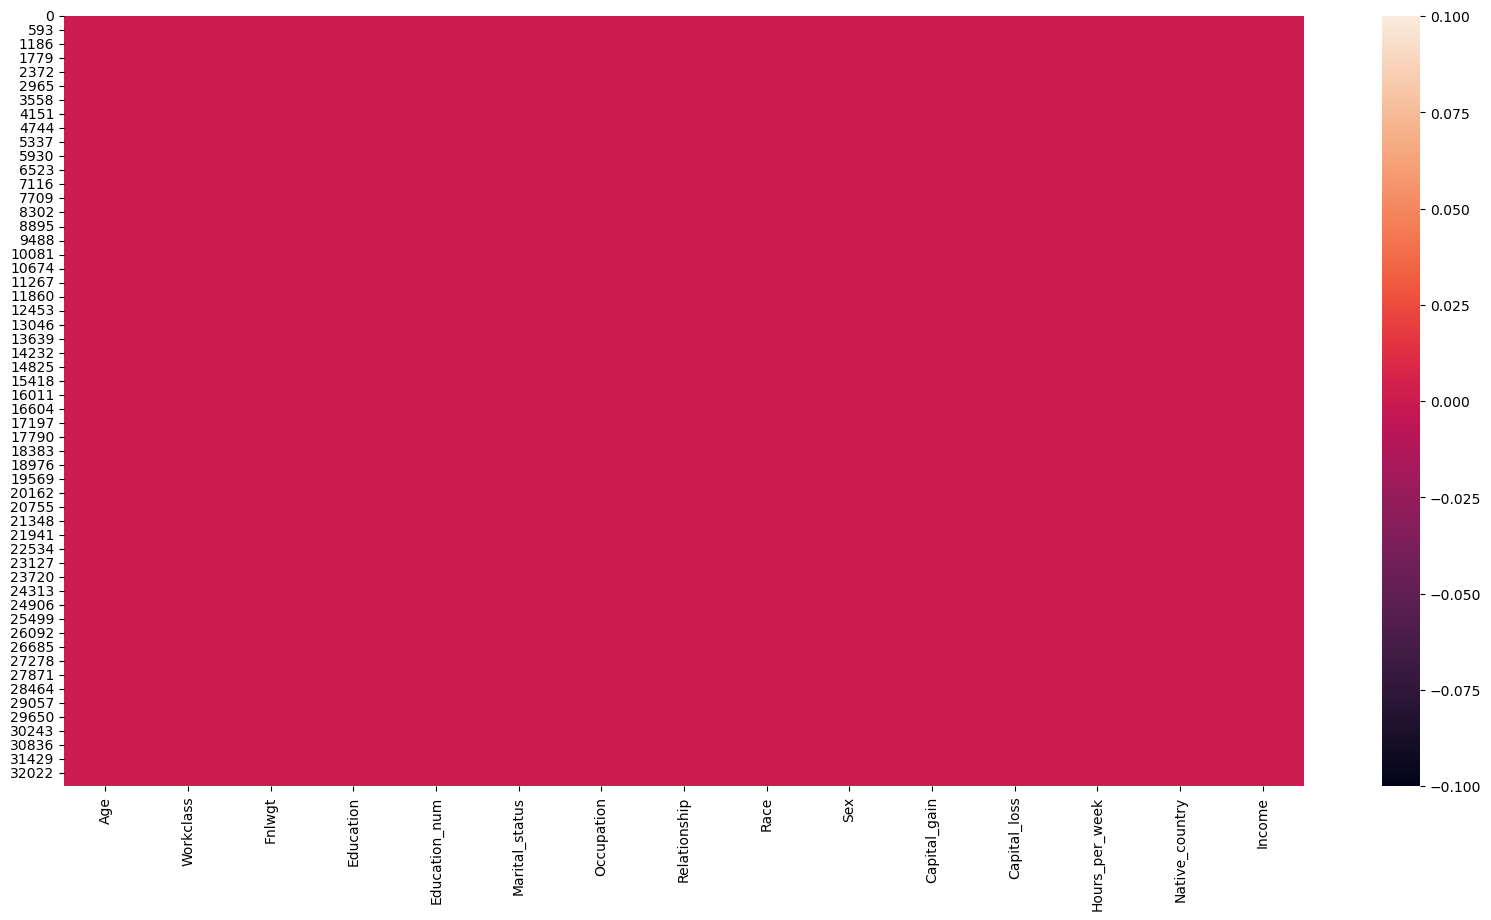

In [11]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isnull())
plt.show()

This shows that there is no null values present in the Dataset so we proceed further 

In [12]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


<Axes: >

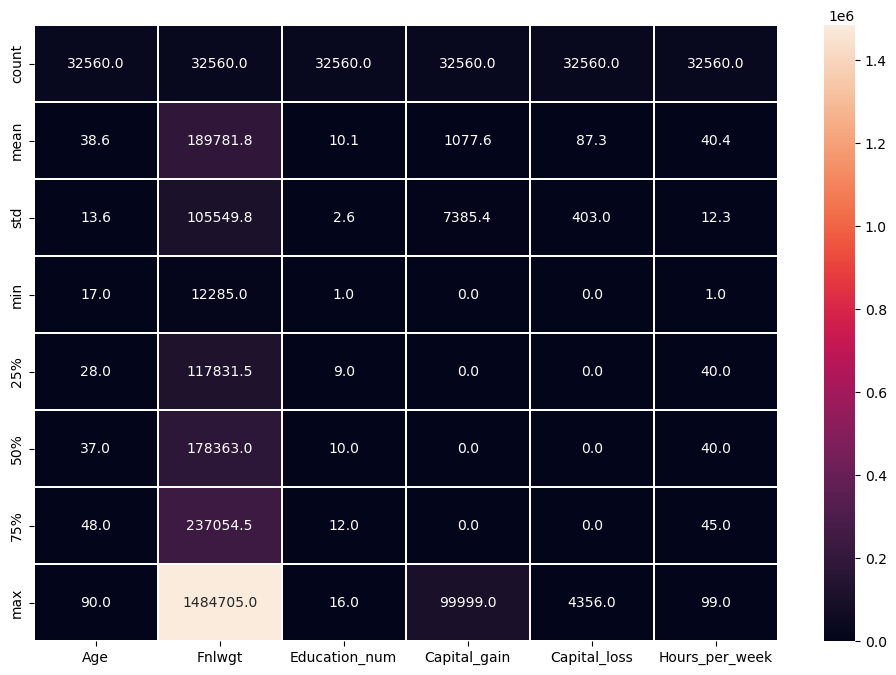

In [13]:
plt.figure(figsize=(12,8))
sns.heatmap(df.describe(),linewidths = 0.1,fmt='0.1f',annot = True)

# Here Saparating the Numerical and Catagorical data 

In [14]:
Numerical=['Age','Fnlwgt','Education_num','Capital_gain','Capital_loss','Hours_per_week']
Category=['Workclass','Education','Marital_status','Occupation','Relationship','Race','Sex','Native_country','Income']

In [15]:
for i in Category:
    print(i)
    print(df[i].value_counts())
    print('='*100)

Workclass
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64
Education
 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64
Marital_status
 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64
Occupation
 Prof-specialty       41

# Data Visualization

Text(0.5, 1.0, 'Income Distribution')

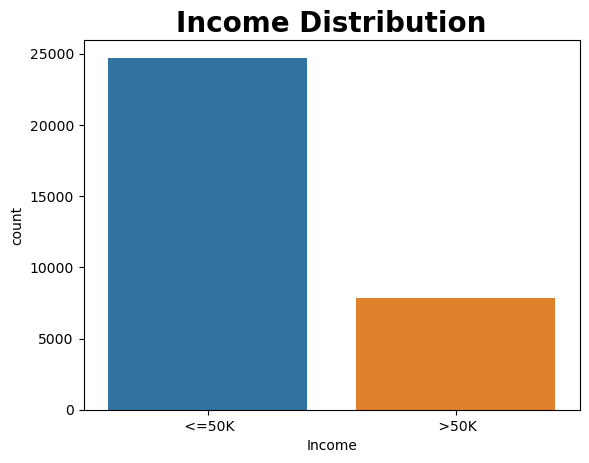

In [16]:
sns.countplot(x='Income',data=df)
plt.title('Income Distribution',fontsize=20,fontweight ='bold')


# Exploring The Age

In [17]:
print('Minimum Age:', df['Age'].min(),'years')
print('Maximum Age:', df['Age'].max(),'years')

Minimum Age: 17 years
Maximum Age: 90 years


# Impact of Age Over Income

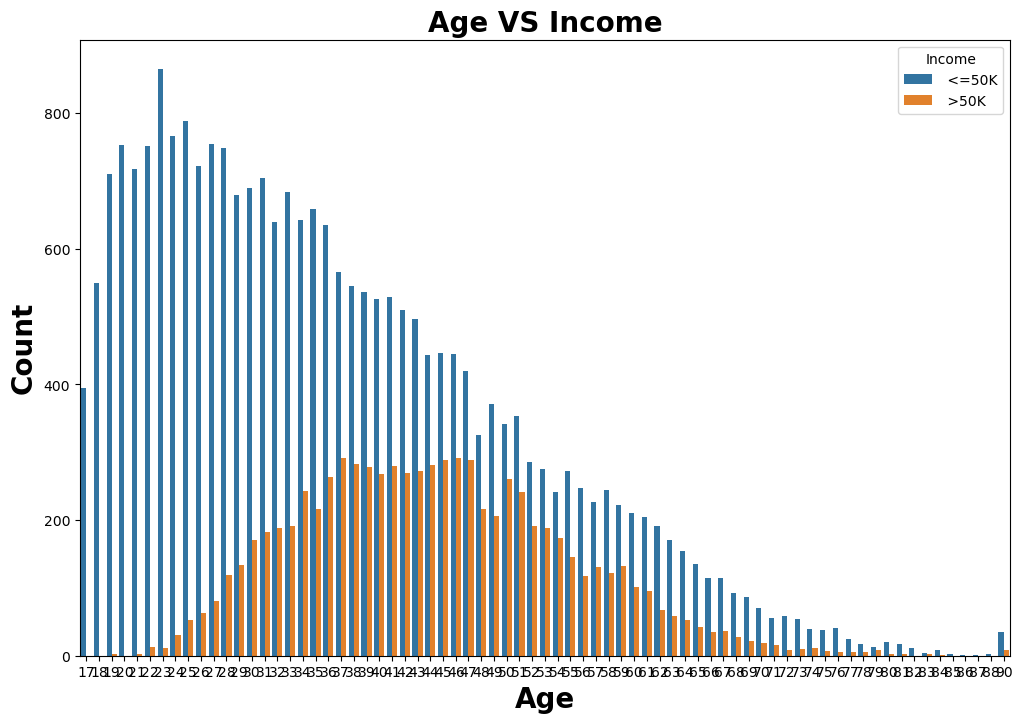

In [18]:
plt.figure(figsize=(12,8),facecolor='white')
sns.countplot(x='Age',hue="Income",data=df)
plt.title('Age VS Income',fontsize=20,fontweight ='bold')
plt.xlabel('Age',fontsize=20,fontweight='bold')
plt.ylabel('Count',fontsize=20,fontweight='bold')
plt.show()

# Impact Of Workclass Over Income 

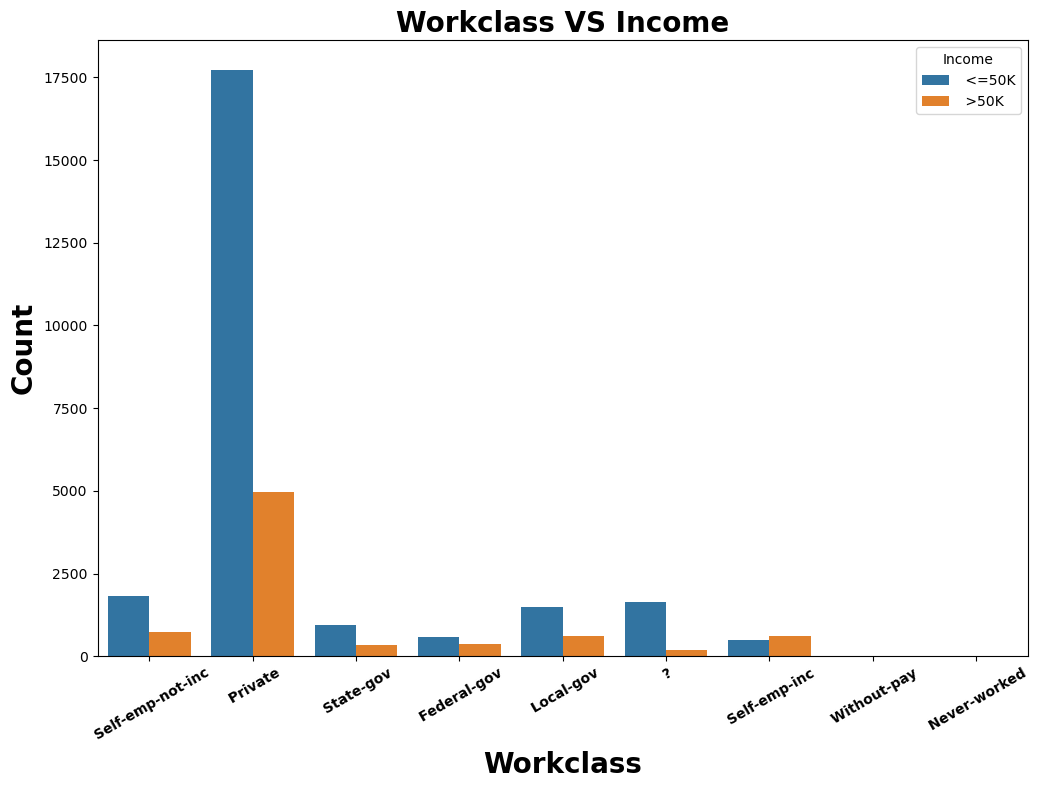

In [19]:
plt.figure(figsize=(12,8),facecolor='white')
sns.countplot(x='Workclass',hue="Income",data=df)
plt.title('Workclass VS Income',fontsize=20,fontweight ='bold')
plt.xlabel('Workclass',fontsize=20,fontweight='bold')
plt.ylabel('Count',fontsize=20,fontweight='bold')
plt.xticks(fontsize=10,fontweight ='bold',rotation=30)
plt.show()

# Impact of Education Over Income

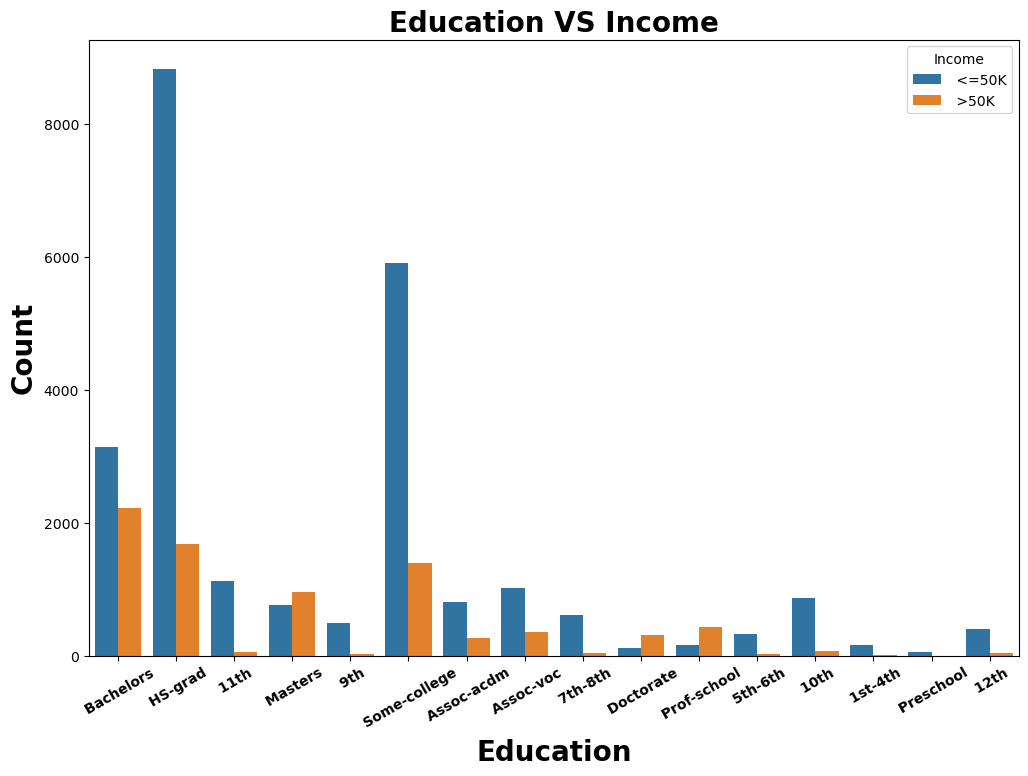

In [20]:
plt.figure(figsize=(12,8),facecolor='white')
sns.countplot(x='Education',hue="Income",data=df)
plt.title('Education VS Income',fontsize=20,fontweight ='bold')
plt.xlabel('Education',fontsize=20,fontweight='bold')
plt.ylabel('Count',fontsize=20,fontweight='bold')
plt.xticks(fontsize=10,fontweight ='bold',rotation=30)
plt.show()

# Impact of Marital Status over Income

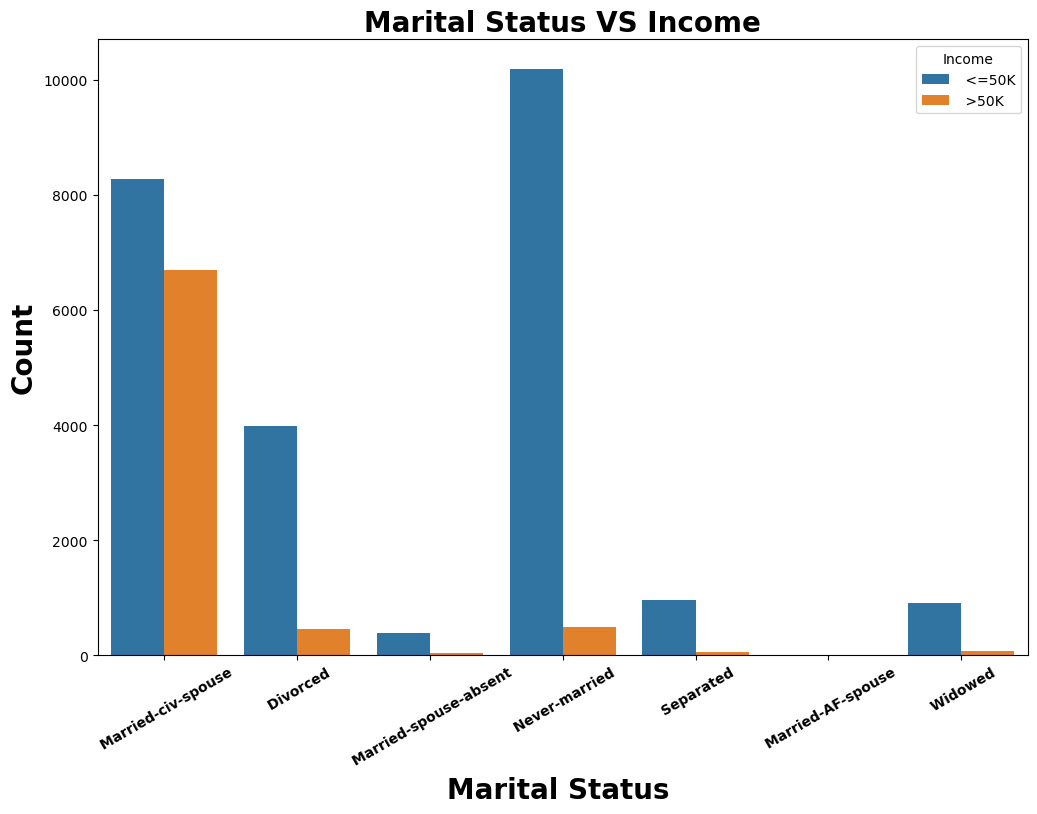

In [21]:
plt.figure(figsize=(12,8),facecolor='white')
sns.countplot(x='Marital_status',hue="Income",data=df)
plt.title('Marital Status VS Income',fontsize=20,fontweight ='bold')
plt.xlabel('Marital Status ',fontsize=20,fontweight='bold')
plt.ylabel('Count',fontsize=20,fontweight='bold')
plt.xticks(fontsize=10,fontweight ='bold',rotation=30)
plt.show()

# Impact of Occupation Over Income

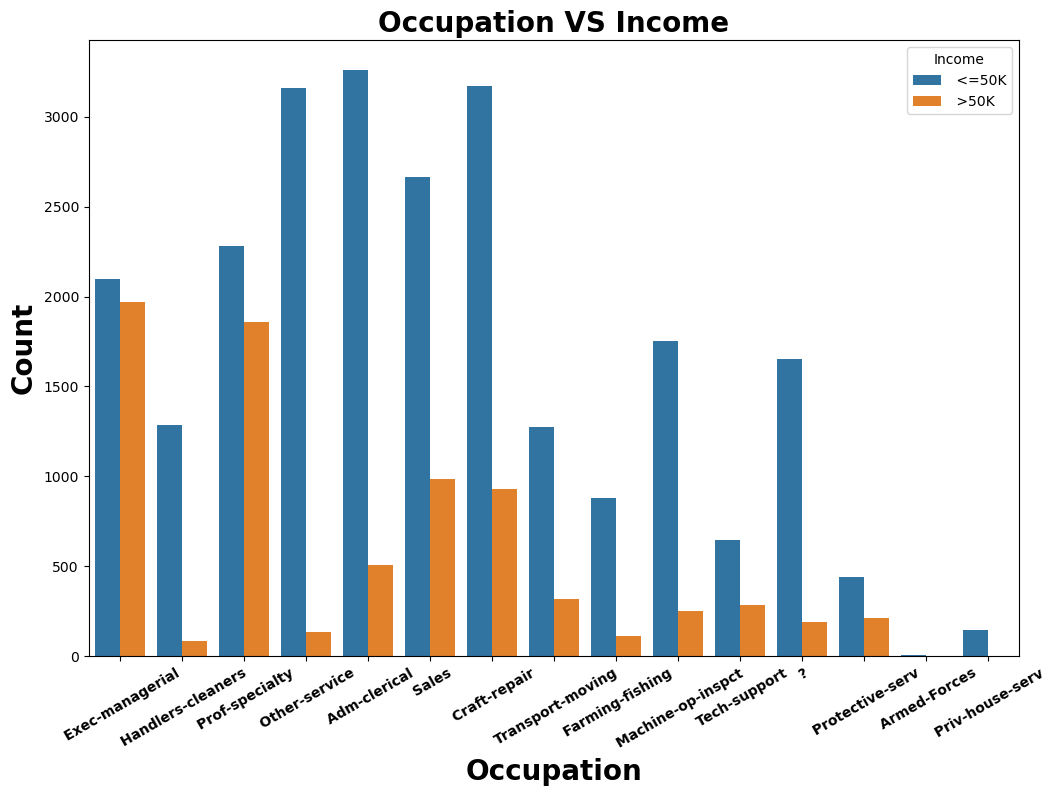

In [22]:
plt.figure(figsize=(12,8),facecolor='white')
sns.countplot(x='Occupation',hue="Income",data=df)
plt.title('Occupation VS Income',fontsize=20,fontweight ='bold')
plt.xlabel('Occupation',fontsize=20,fontweight='bold')
plt.ylabel('Count',fontsize=20,fontweight='bold')
plt.xticks(fontsize=10,fontweight ='bold',rotation=30)
plt.show()

# Impact of Relationship Over Income

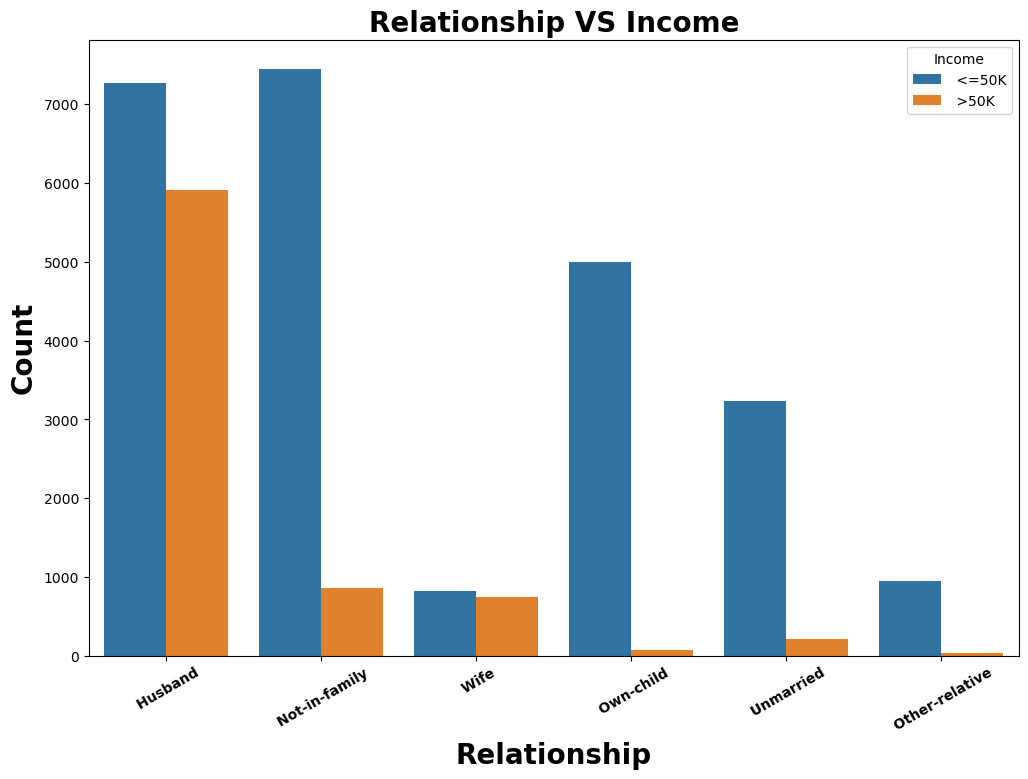

In [23]:
plt.figure(figsize=(12,8),facecolor='white')
sns.countplot(x='Relationship',hue="Income",data=df)
plt.title('Relationship VS Income',fontsize=20,fontweight ='bold')
plt.xlabel('Relationship',fontsize=20,fontweight='bold')
plt.ylabel('Count',fontsize=20,fontweight='bold')
plt.xticks(fontsize=10,fontweight ='bold',rotation=30)
plt.show()

# Impact of Race over Income

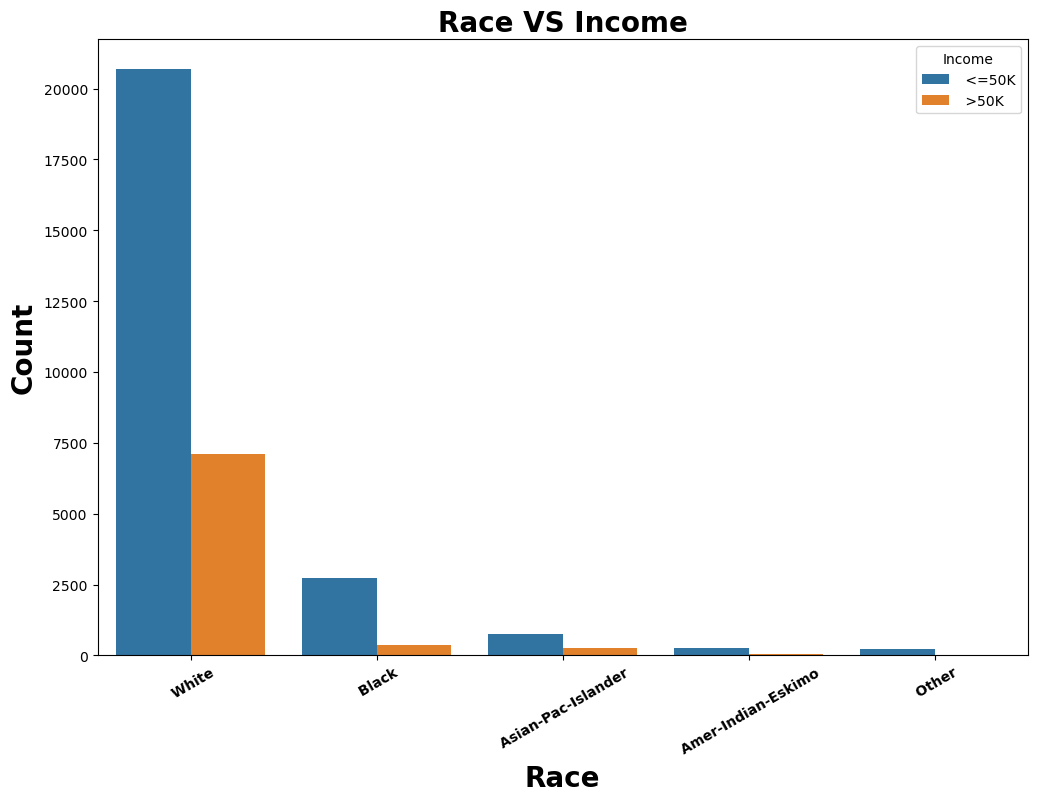

In [24]:
plt.figure(figsize=(12,8),facecolor='white')
sns.countplot(x='Race',hue="Income",data=df)
plt.title('Race VS Income',fontsize=20,fontweight ='bold')
plt.xlabel('Race',fontsize=20,fontweight='bold')
plt.ylabel('Count',fontsize=20,fontweight='bold')
plt.xticks(fontsize=10,fontweight ='bold',rotation=30)
plt.show()

# Impact of Sex Over Income

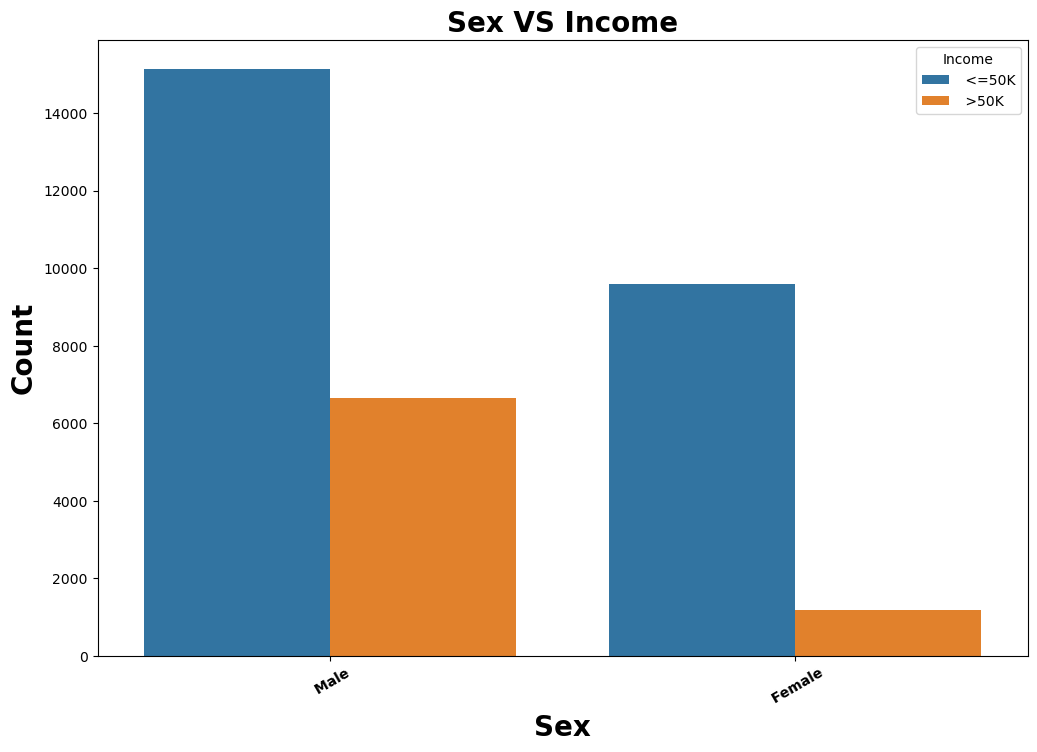

In [25]:
plt.figure(figsize=(12,8),facecolor='white')
sns.countplot(x='Sex',hue="Income",data=df)
plt.title('Sex VS Income',fontsize=20,fontweight ='bold')
plt.xlabel('Sex',fontsize=20,fontweight='bold')
plt.ylabel('Count',fontsize=20,fontweight='bold')
plt.xticks(fontsize=10,fontweight ='bold',rotation=30)
plt.show()

# Violin Plot

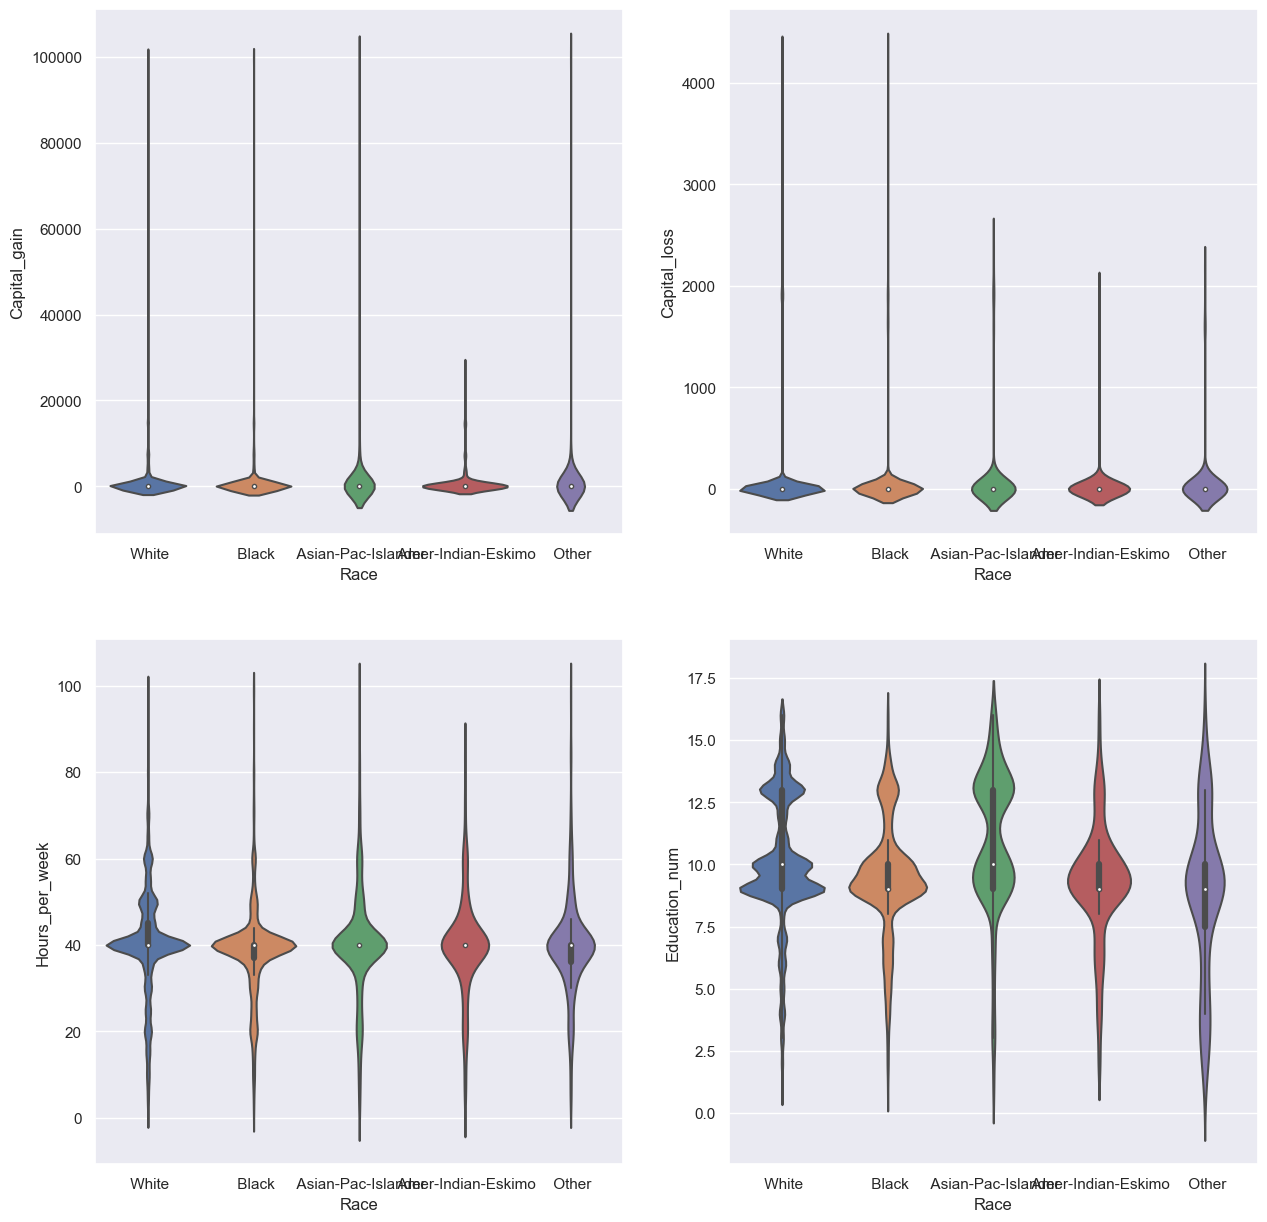

In [26]:

plt.rcParams['figure.figsize'] = [15,15]
sns.set(style = 'darkgrid')
plt.subplot(2,2,1)
sns.violinplot(x = df['Race'], y = df['Capital_gain'], data = df);
plt.subplot(2,2,2)
sns.violinplot(x = df['Race'], y = df['Capital_loss'], data = df);
plt.subplot(2,2,3)
sns.violinplot(x = df['Race'], y = df['Hours_per_week'], data = df);
plt.subplot(2,2,4)
sns.violinplot(x = df['Race'], y = df['Education_num'], data = df);



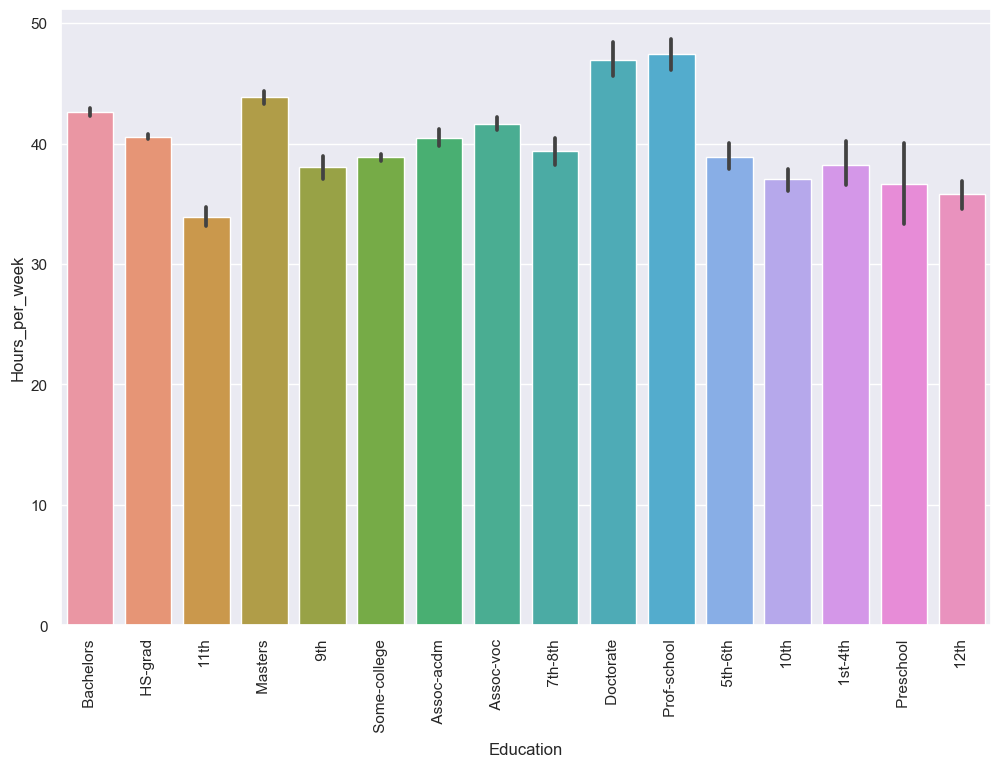

In [27]:
sns.set(rc={'figure.figsize':(12,8)})
sns_grad = sns.barplot(x = df['Education'], y = df['Hours_per_week'], data = df)
plt.setp(sns_grad.get_xticklabels(), rotation=90)
plt.show()

# Now we are going to encode the categorical data 

In [28]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
for i in Category:
    df[i] = lb.fit_transform(df[i])
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
1,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
2,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
3,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0
4,37,4,284582,12,14,2,4,5,4,0,0,0,40,39,0


we can see this the categorical data has been encoded so lets proceed to the next step

# Outliers Detection

From the box plot we can check that the outliers are present in the dataframe or not then we can proceed to the next step

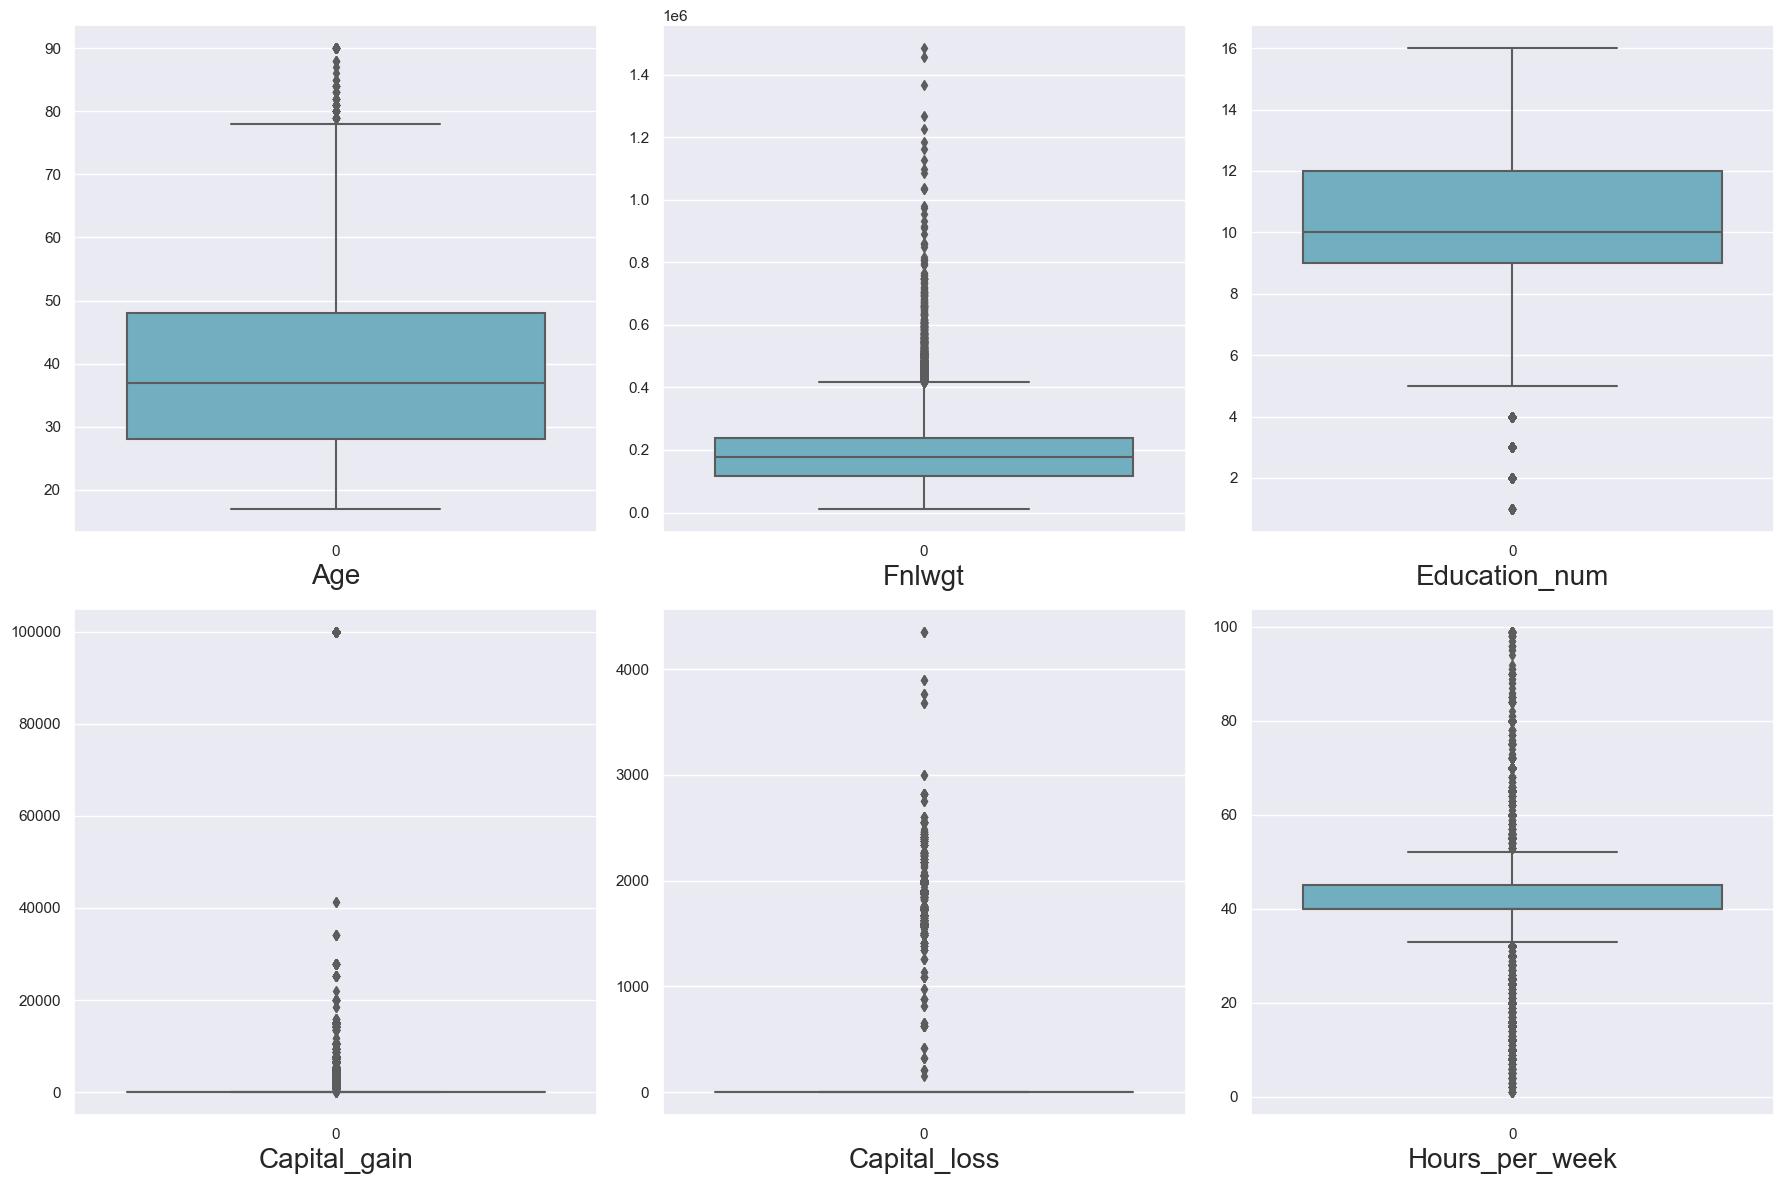

In [29]:
plt.figure(figsize=(18,12),facecolor='white')
plotnumber=1

for column in Numerical:
    if plotnumber<=6:
        ax=plt.subplot(2,3,plotnumber)
        sns.boxplot(df[column],color='c')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show()

now we can check that their are too many outliers

# Lets drop the unnecessory columns first then proceed for the outliers removal step

In [30]:
df.drop(["Fnlwgt", "Education"], axis=1, inplace=True)

# Outliers removal

In [31]:
from scipy.stats import zscore
z = np.abs(zscore(df))
threshold = 3
df1 = df[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", df.shape)
print ("Shape of the dataframe after removing outliers: ", df1.shape)
print ("Percentage of data loss post outlier removal: ", (df.shape[0]-df1.shape[0])/df.shape[0]*100)

df=df1.copy()

Shape of the dataframe before removing outliers:  (32560, 13)
Shape of the dataframe after removing outliers:  (27721, 13)
Percentage of data loss post outlier removal:  14.861793611793612


we are lossing the 14.86 percent of data 

# Checking the Skewness of the features 

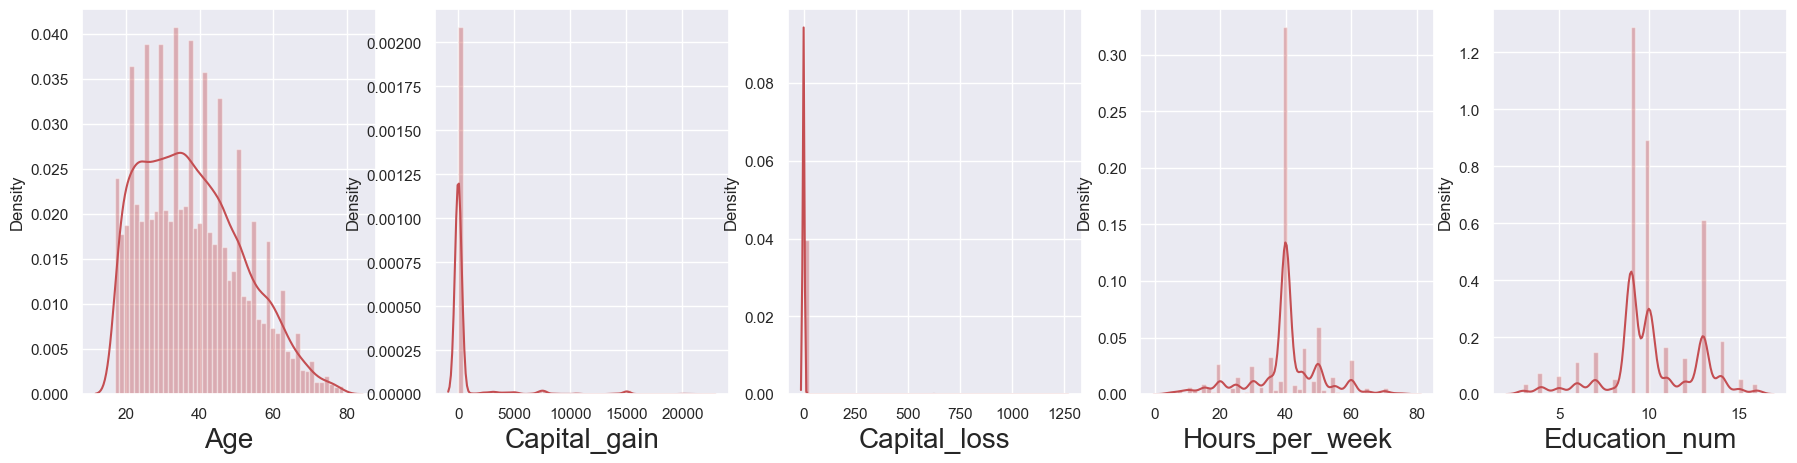

In [32]:
plt.figure(figsize=(22,5),facecolor='white')
plotnum=1
for col in df[['Age','Capital_gain','Capital_loss','Hours_per_week','Education_num']]:
    if plotnum<=5:
        plt.subplot(1,5,plotnum)
        sns.distplot(df[col],color='r')
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

In [33]:
df.skew()

Age                0.486460
Workclass         -0.738585
Education_num     -0.145874
Marital_status    -0.045972
Occupation         0.132880
Relationship       0.748903
Race              -2.557087
Sex               -0.684763
Capital_gain       4.931796
Capital_loss      29.488410
Hours_per_week    -0.358951
Native_country    -5.398676
Income             1.324684
dtype: float64

# lets settel the skewness

In [34]:
from sklearn.preprocessing import power_transform

df[['Capital_loss',"Capital_gain"]]=power_transform(df[['Capital_loss',"Capital_gain"]])


In [35]:
df.skew()

Age                0.486460
Workclass         -0.738585
Education_num     -0.145874
Marital_status    -0.045972
Occupation         0.132880
Relationship       0.748903
Race              -2.557087
Sex               -0.684763
Capital_gain       3.069312
Capital_loss      24.760658
Hours_per_week    -0.358951
Native_country    -5.398676
Income             1.324684
dtype: float64

# Now checking the Correlation of the Data 

In [36]:
df.corr()

,Age,Workclass,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
Age,1.000000,0.005209,0.045116,-0.286121,-0.015760,-0.270445,0.019752,0.088403,0.122066,0.021826,0.091416,0.033687,0.241072
Workclass,0.005209,1.000000,0.049185,-0.061108,0.249647,-0.090085,0.064040,0.092953,0.010160,-0.006744,0.126878,-0.003097,0.041137
Education_num,0.045116,0.049185,1.000000,-0.058487,0.111350,-0.094026,0.084084,0.003581,0.104699,0.006927,0.157715,0.141815,0.321093
Marital_status,-0.286121,-0.061108,-0.058487,1.000000,-0.007585,0.182406,-0.084180,-0.124692,-0.063485,-0.018044,-0.197925,-0.034515,-0.193459
Occupation,-0.015760,0.249647,0.111350,-0.007585,1.000000,-0.077785,0.011178,0.082459,0.014703,-0.000075,0.069276,0.009648,0.070743
Relationship,-0.270445,-0.090085,-0.094026,0.182406,-0.077785,1.000000,-0.148303,-0.576261,-0.080617,0.037239,-0.261773,-0.019902,-0.248777
Race,0.019752,0.064040,0.084084,-0.084180,0.011178,-0.148303,1.000000,0.124375,0.032092,-0.002124,0.058255,0.055493,0.094089
Sex,0.088403,0.092953,0.003581,-0.124692,0.082459,-0.576261,0.124375,1.000000,0.063954,-0.033695,0.235766,-0.006010,0.212252
Capital_gain,0.122066,0.010160,0.104699,-0.063485,0.014703,-0.080617,0.032092,0.063954,1.000000,-0.011979,0.073073,0.022532,0.263643
Capital_loss,0.021826,-0.006744,0.006927,-0.018044,-0.000075,0.037239,-0.002124,-0.033695,-0.011979,1.000000,-0.003351,0.001700,-0.017360


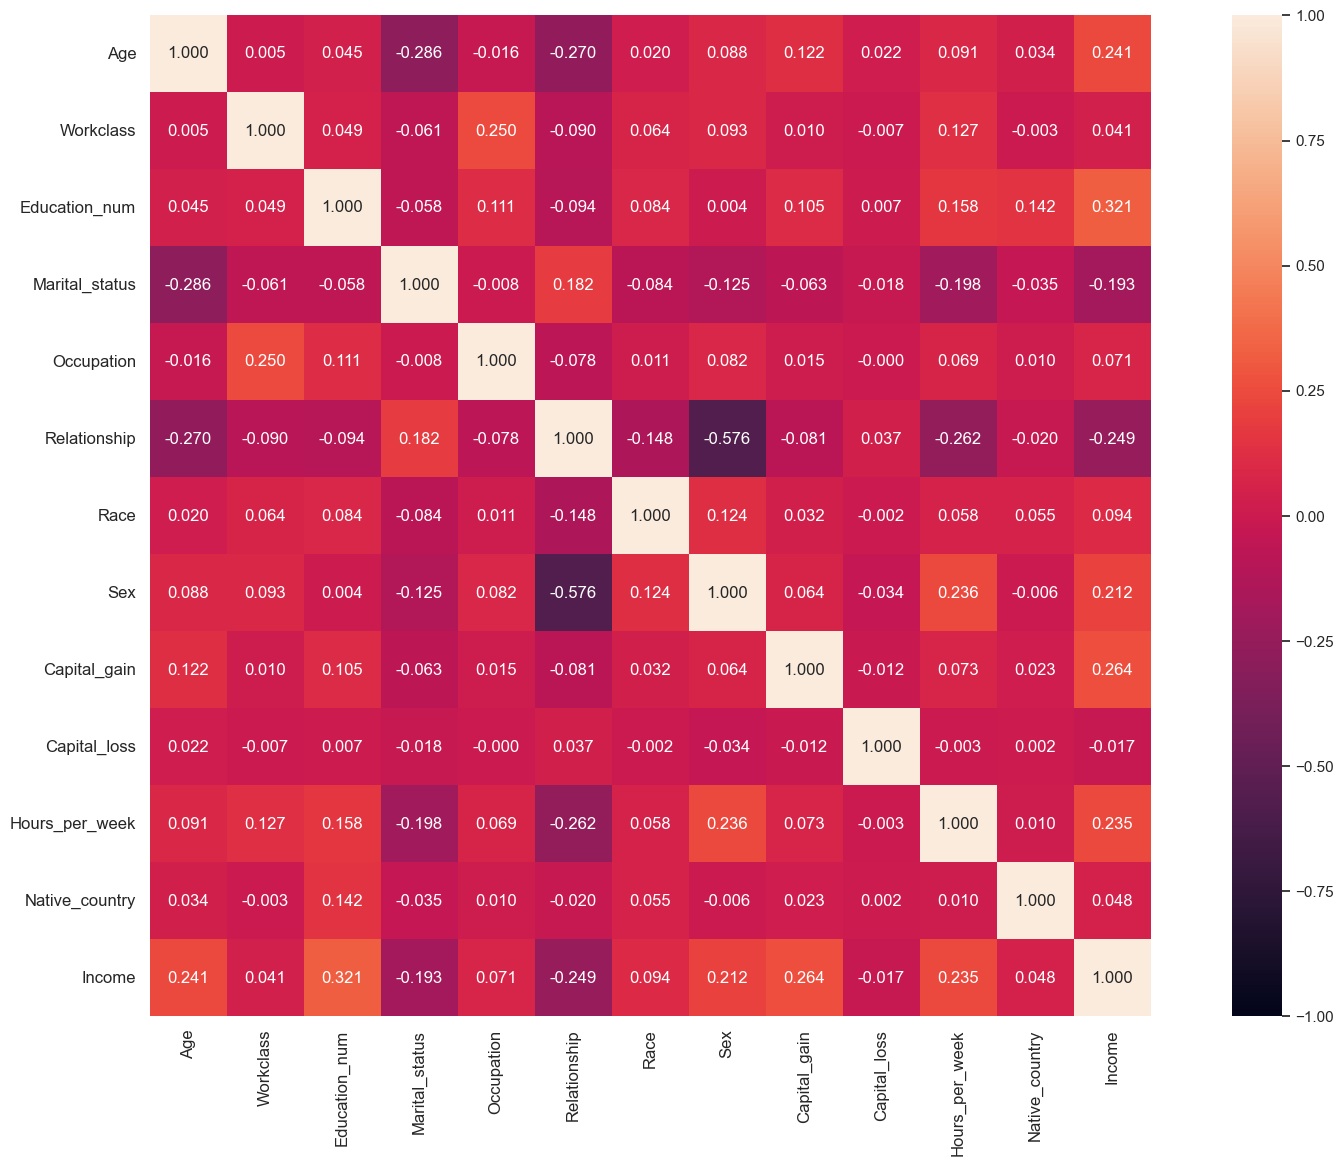

In [37]:
plt.figure(figsize=(21,13))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Checking the Multicollinearity 

In [38]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif= pd.DataFrame()
vif['VIF']= [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
vif['Features']= df.columns
vif

,VIF,Features
0,10.270154,Age
1,8.731505,Workclass
2,21.279953,Education_num
3,4.311073,Marital_status
4,3.654651,Occupation
5,2.908663,Relationship
6,36.519594,Race
7,4.523073,Sex
8,1.078573,Capital_gain
9,1.003508,Capital_loss


In [39]:
df.Income.value_counts()

0    21514
1     6207
Name: Income, dtype: int64

# Balancing the Imbalanced cells using Smote 

In [40]:
from imblearn.over_sampling import SMOTE

# Splitting data in target and dependent feature
x = df.drop(['Income'], axis =1)
y = df['Income']

In [41]:
oversample = SMOTE()
x, y = oversample.fit_resample(x, y)

In [42]:
y.value_counts()

0    21514
1    21514
Name: Income, dtype: int64

# Standard Scaling

In [43]:

from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()

x = scaler.fit_transform(x)

In [44]:
from sklearn.decomposition import PCA
pca = PCA()
x = pca.fit_transform(x)

In [45]:
pca = PCA(n_components=9)
x = pca.fit_transform(x)


In [46]:
principle_x=pd.DataFrame(x,columns=np.arange(9))

# Building Machine Learning Model

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score

from sklearn.metrics import plot_roc_curve

In [48]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=99, test_size=.3)
print('Training feature matrix size:',x_train.shape)
print('Training target vector size:',y_train.shape)
print('Test feature matrix size:',x_test.shape)
print('Test target vector size:',y_test.shape)

Training feature matrix size: (30119, 9)
Training target vector size: (30119,)
Test feature matrix size: (12909, 9)
Test target vector size: (12909,)


In [49]:
df.shape

(27721, 13)

# Finding the Best Random State

In [50]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
maxAccu=0
maxRS=0
for i in range(1,250):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3, random_state=i)
    log_reg=LogisticRegression()
    log_reg.fit(x_train,y_train)
    y_pred=log_reg.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu ,'on Random_state', maxRS)

Best accuracy is 0.7691533038965063 on Random_state 243


# Logistic Regression

In [51]:
LR=LogisticRegression()
LR.fit(x_train,y_train)
print(LR.score(x_train,y_train))
LR_predict=LR.predict(x_test)

0.7607490288522195


Classification ML Algorithm Evaluation Matrix for Logistic Regression is


Accuracy Score : 0.7576109690913316


Confusion matrix :
 [[4719 1624]
 [1505 5061]]


Classification Report :
               precision    recall  f1-score   support

           0       0.76      0.74      0.75      6343
           1       0.76      0.77      0.76      6566

    accuracy                           0.76     12909
   macro avg       0.76      0.76      0.76     12909
weighted avg       0.76      0.76      0.76     12909





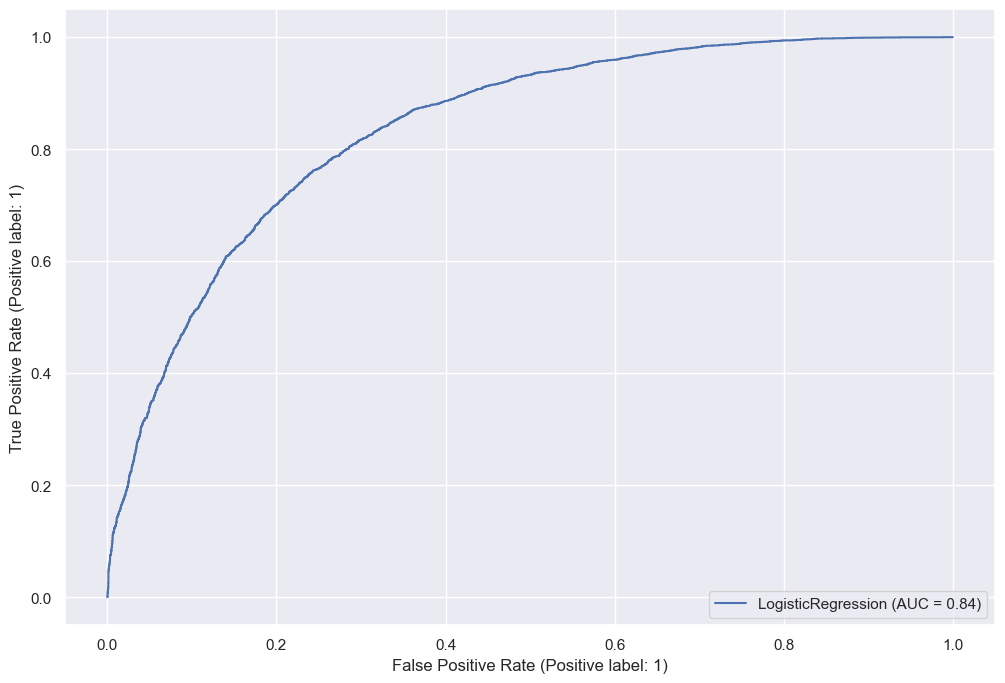

In [52]:
print('Classification ML Algorithm Evaluation Matrix for Logistic Regression is' )
print('\n')
print('Accuracy Score :', accuracy_score(y_test, y_pred))
print('\n')
print('Confusion matrix :'+'\n',confusion_matrix(y_test, y_pred))
print('\n')
print('Classification Report :'+'\n',classification_report(y_test, y_pred))
print('\n')
disp = plot_roc_curve(LR,x_test,y_test)   
plt.legend(prop={'size':11}, loc='lower right')
plt.show()

# SVC Model

Classification ML Algorithm Evaluation Matrix SVC Model is


Accuracy Score : 0.8228367805407081


Confusion matrix :
 [[4747 1596]
 [ 691 5875]]


Classification Report :
               precision    recall  f1-score   support

           0       0.87      0.75      0.81      6343
           1       0.79      0.89      0.84      6566

    accuracy                           0.82     12909
   macro avg       0.83      0.82      0.82     12909
weighted avg       0.83      0.82      0.82     12909





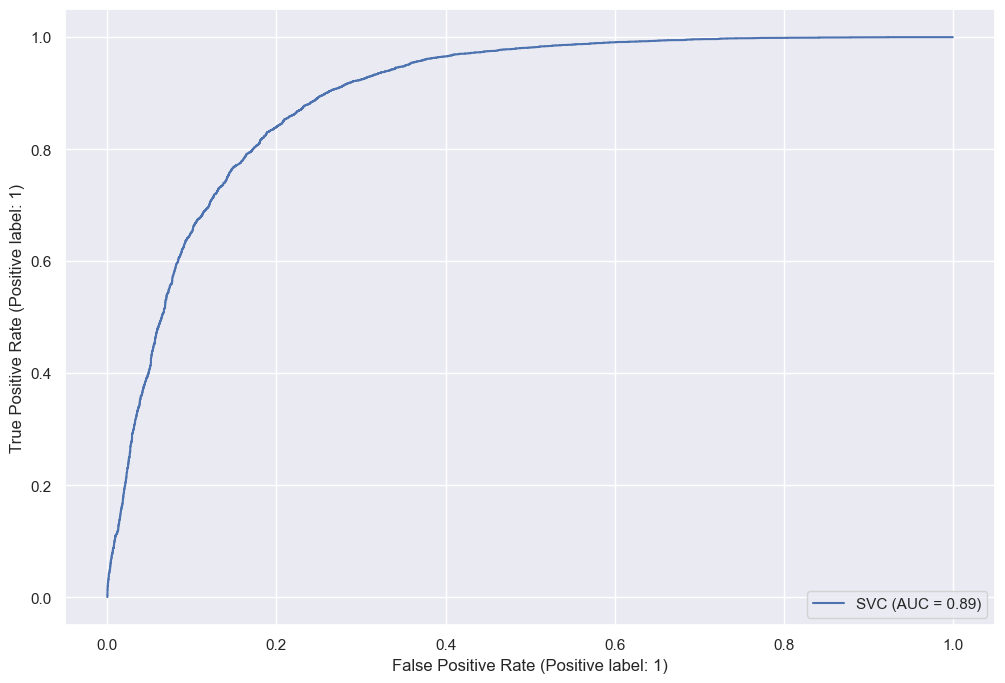

In [53]:
svc = SVC()
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)
print('Classification ML Algorithm Evaluation Matrix SVC Model is' )
print('\n')
print('Accuracy Score :', accuracy_score(y_test, y_pred))
print('\n')
print('Confusion matrix :'+'\n',confusion_matrix(y_test, y_pred))
print('\n')
print('Classification Report :'+'\n',classification_report(y_test, y_pred))
print('\n')
disp = plot_roc_curve(svc,x_test,y_test)   
plt.legend(prop={'size':11}, loc='lower right')
plt.show()


# GaussianNB Model

Classification ML Algorithm Evaluation Matrix for GaussianNB is


Accuracy Score : 0.7042373537841816


Confusion matrix :
 [[3597 2746]
 [1072 5494]]


Classification Report :
               precision    recall  f1-score   support

           0       0.77      0.57      0.65      6343
           1       0.67      0.84      0.74      6566

    accuracy                           0.70     12909
   macro avg       0.72      0.70      0.70     12909
weighted avg       0.72      0.70      0.70     12909





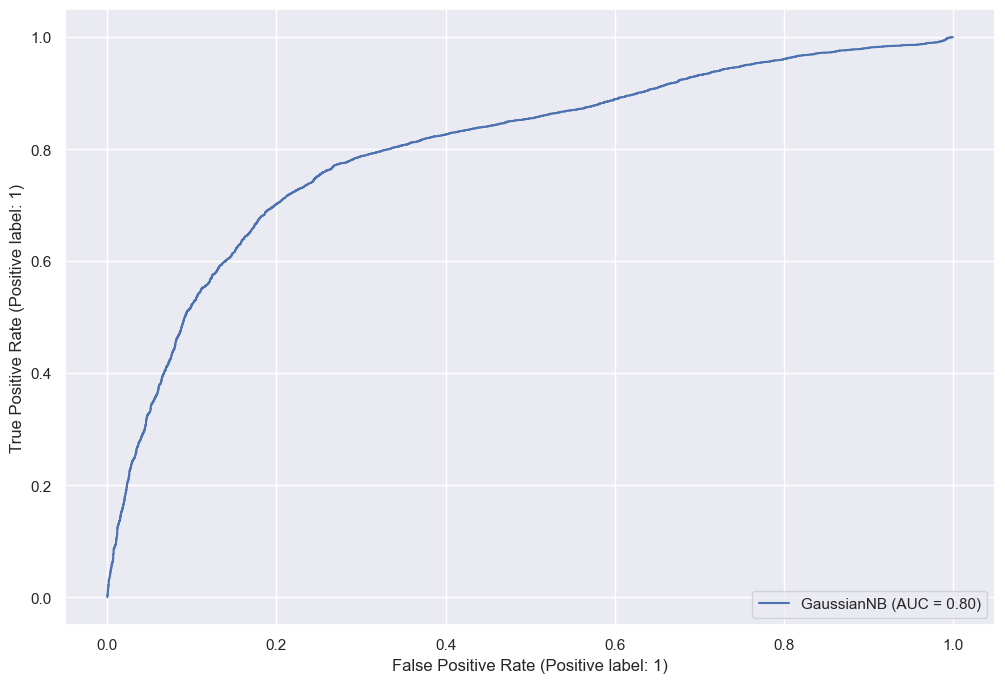

In [54]:
GNB =GaussianNB()
GNB.fit(x_train,y_train)
y_pred=GNB.predict(x_test)
print('Classification ML Algorithm Evaluation Matrix for GaussianNB is' )
print('\n')
print('Accuracy Score :', accuracy_score(y_test, y_pred))
print('\n')
print('Confusion matrix :'+'\n',confusion_matrix(y_test, y_pred))
print('\n')
print('Classification Report :'+'\n',classification_report(y_test, y_pred))
print('\n')
disp = plot_roc_curve(GNB,x_test,y_test)   
plt.legend(prop={'size':11}, loc='lower right')
plt.show()

# DecisionTreeClassifier Model

Classification ML Algorithm Evaluation Matrix for Decision Tree Classifier is


Accuracy Score : 0.8075761096909133


Confusion matrix :
 [[5097 1246]
 [1238 5328]]


Classification Report :
               precision    recall  f1-score   support

           0       0.80      0.80      0.80      6343
           1       0.81      0.81      0.81      6566

    accuracy                           0.81     12909
   macro avg       0.81      0.81      0.81     12909
weighted avg       0.81      0.81      0.81     12909





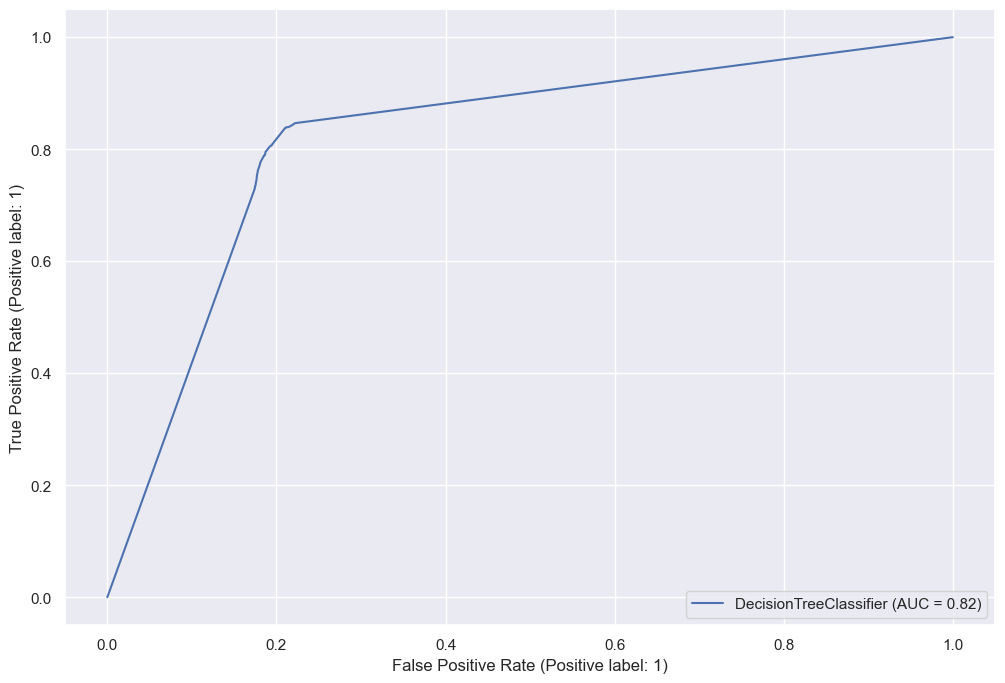

In [55]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
y_pred=dtc.predict(x_test)
print('Classification ML Algorithm Evaluation Matrix for Decision Tree Classifier is' )
print('\n')
print('Accuracy Score :', accuracy_score(y_test, y_pred))
print('\n')
print('Confusion matrix :'+'\n',confusion_matrix(y_test, y_pred))
print('\n')
print('Classification Report :'+'\n',classification_report(y_test, y_pred))
print('\n')
disp = plot_roc_curve(dtc,x_test,y_test)   
plt.legend(prop={'size':11}, loc='lower right')
plt.show()

# KNeighborsClassifier Model

Classification ML Algorithm Evaluation Matrix for KNeighborsClassifier is


Accuracy Score : 0.8341467193430939


Confusion matrix :
 [[5085 1258]
 [ 883 5683]]


Classification Report :
               precision    recall  f1-score   support

           0       0.85      0.80      0.83      6343
           1       0.82      0.87      0.84      6566

    accuracy                           0.83     12909
   macro avg       0.84      0.83      0.83     12909
weighted avg       0.84      0.83      0.83     12909





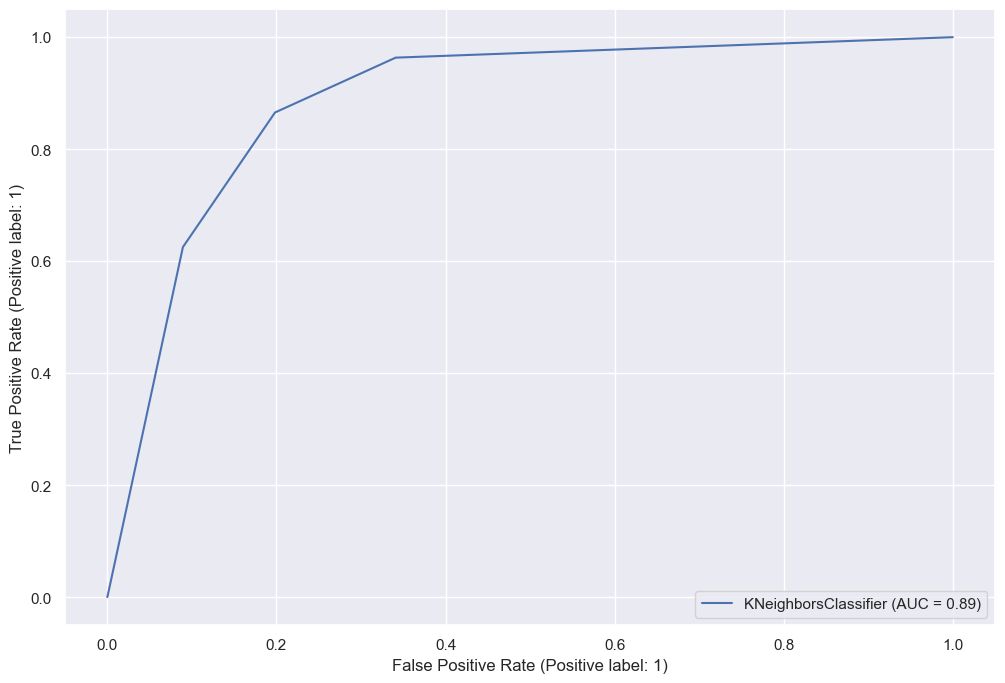

In [56]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
print('Classification ML Algorithm Evaluation Matrix for KNeighborsClassifier is' )
print('\n')
print('Accuracy Score :', accuracy_score(y_test, y_pred))
print('\n')
print('Confusion matrix :'+'\n',confusion_matrix(y_test, y_pred))
print('\n')
print('Classification Report :'+'\n',classification_report(y_test, y_pred))
print('\n')
disp = plot_roc_curve(knn,x_test,y_test)   
plt.legend(prop={'size':11}, loc='lower right')
plt.show()

# RandomForestClassifier Model

Classification ML Algorithm Evaluation Matrix RandomForestClassifier is


Accuracy Score : 0.8492524595243629


Confusion matrix :
 [[5249 1094]
 [ 852 5714]]


Classification Report :
               precision    recall  f1-score   support

           0       0.86      0.83      0.84      6343
           1       0.84      0.87      0.85      6566

    accuracy                           0.85     12909
   macro avg       0.85      0.85      0.85     12909
weighted avg       0.85      0.85      0.85     12909





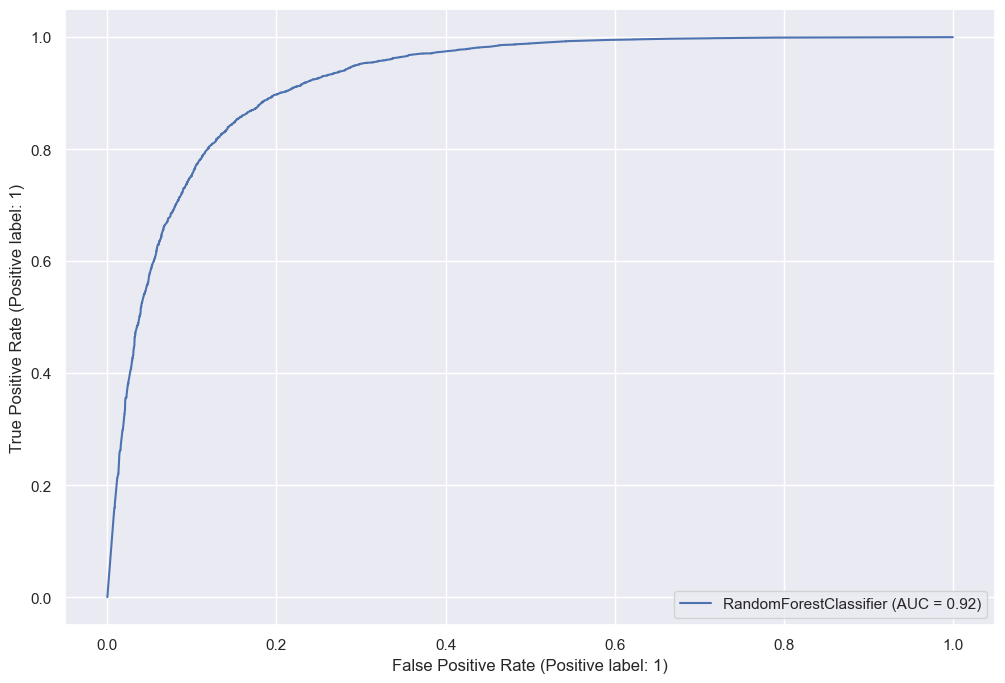

In [57]:
rfc =  RandomForestClassifier()
rfc.fit(x_train,y_train)
y_pred=rfc.predict(x_test)
print('Classification ML Algorithm Evaluation Matrix RandomForestClassifier is' )
print('\n')
print('Accuracy Score :', accuracy_score(y_test, y_pred))
print('\n')
print('Confusion matrix :'+'\n',confusion_matrix(y_test, y_pred))
print('\n')
print('Classification Report :'+'\n',classification_report(y_test, y_pred))
print('\n')
disp = plot_roc_curve(rfc,x_test,y_test)   
plt.legend(prop={'size':11}, loc='lower right')
plt.show()

# ExtraTreesClassifier Model

Classification ML Algorithm Evaluation Matrix for ExtraTreesClassifier is


Accuracy Score : 0.8468510341622124


Confusion matrix :
 [[5309 1034]
 [ 943 5623]]


Classification Report :
               precision    recall  f1-score   support

           0       0.85      0.84      0.84      6343
           1       0.84      0.86      0.85      6566

    accuracy                           0.85     12909
   macro avg       0.85      0.85      0.85     12909
weighted avg       0.85      0.85      0.85     12909





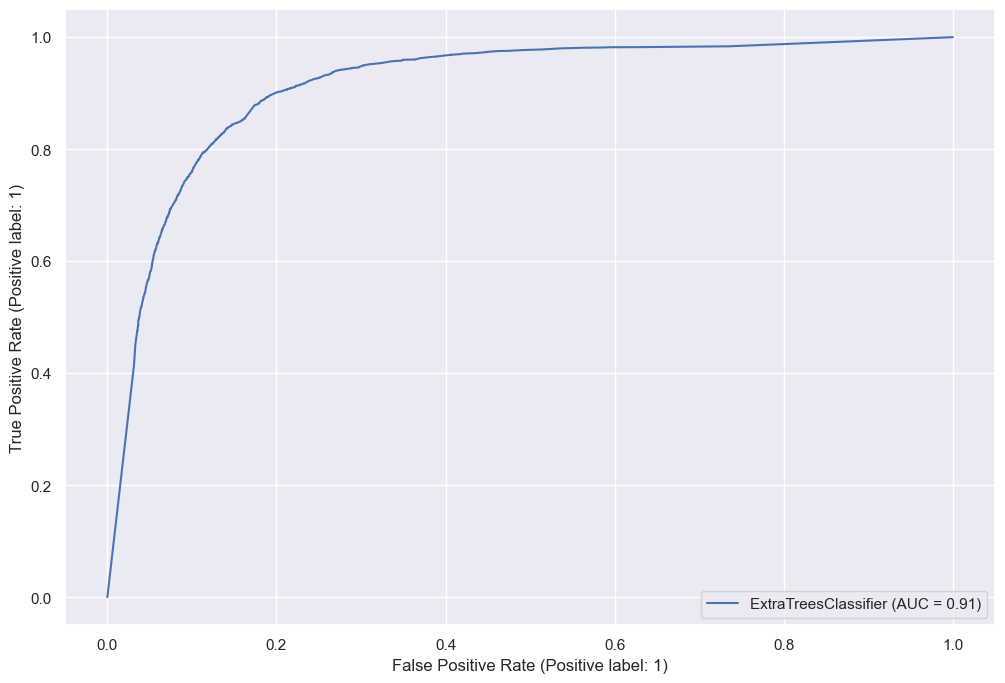

In [58]:
ETC =  ExtraTreesClassifier()
ETC.fit(x_train,y_train)
y_pred=ETC.predict(x_test)
print('Classification ML Algorithm Evaluation Matrix for ExtraTreesClassifier is' )
print('\n')
print('Accuracy Score :', accuracy_score(y_test, y_pred))
print('\n')
print('Confusion matrix :'+'\n',confusion_matrix(y_test, y_pred))
print('\n')
print('Classification Report :'+'\n',classification_report(y_test, y_pred))
print('\n')
disp = plot_roc_curve(ETC,x_test,y_test)   
plt.legend(prop={'size':11}, loc='lower right')
plt.show()

# Cross Validation Score

In [59]:
from sklearn.model_selection import cross_val_score

np.random.seed(10)
def rmse_cv(model, x,y):
    rmse =- (cross_val_score(model, x,y, scoring='neg_mean_squared_error', cv=5))
    return(rmse)


models =[LogisticRegression(),
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 3),
        RandomForestClassifier(),
        ExtraTreesClassifier()]


names = ['LR','svc','GNB','dtc','knn','rfc','ETC']

for model,name in zip(models,names):
    score = rmse_cv(model,x,y)
    print("{}    : {:.6f}, {:4f}".format(name,score.mean(),score.std()))


LR    : 0.240680, 0.004470
svc    : 0.180696, 0.006975
GNB    : 0.292647, 0.009518
dtc    : 0.187575, 0.018724
knn    : 0.165171, 0.015034
rfc    : 0.146090, 0.016792
ETC    : 0.146904, 0.018045


# Grid Search CV 

In [60]:
from sklearn.model_selection import GridSearchCV
parameter = {  'bootstrap': [True], 'max_depth': [5, 10,20,40,50,60], 
              'max_features': ['auto', 'log2'], 
              'criterion':['gini','entropy'],
              'n_estimators': [5, 10, 15 ,25,50,60,70]}

In [ ]:
GCV = GridSearchCV(RandomForestClassifier(),parameter,verbose=10)
GCV.fit(x_train,y_train)

Fitting 5 folds for each of 168 candidates, totalling 840 fits
[CV 1/5; 1/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5
[CV 1/5; 1/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.789 total time=   0.1s
[CV 2/5; 1/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5
[CV 2/5; 1/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.795 total time=   0.1s
[CV 3/5; 1/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5
[CV 3/5; 1/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.797 total time=   0.0s
[CV 4/5; 1/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5
[CV 4/5; 1/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.790 total time=   0.0s
[CV 5

[CV 2/5; 8/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=log2, n_estimators=5;, score=0.796 total time=   0.0s
[CV 3/5; 8/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=log2, n_estimators=5
[CV 3/5; 8/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=log2, n_estimators=5;, score=0.791 total time=   0.1s
[CV 4/5; 8/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=log2, n_estimators=5
[CV 4/5; 8/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=log2, n_estimators=5;, score=0.797 total time=   0.1s
[CV 5/5; 8/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=log2, n_estimators=5
[CV 5/5; 8/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=log2, n_estimators=5;, score=0.794 total time=   0.0s
[CV 1/5; 9/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=log2, n_estimators=10
[CV 1/5; 9/168] END bootstrap=True, criterion=gini, max_depth=5, ma

[CV 2/5; 15/168] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, n_estimators=5;, score=0.824 total time=   0.2s
[CV 3/5; 15/168] START bootstrap=True, criterion=gini, max_depth=10, max_features=auto, n_estimators=5
[CV 3/5; 15/168] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, n_estimators=5;, score=0.813 total time=   0.2s
[CV 4/5; 15/168] START bootstrap=True, criterion=gini, max_depth=10, max_features=auto, n_estimators=5
[CV 4/5; 15/168] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, n_estimators=5;, score=0.824 total time=   0.2s
[CV 5/5; 15/168] START bootstrap=True, criterion=gini, max_depth=10, max_features=auto, n_estimators=5
[CV 5/5; 15/168] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, n_estimators=5;, score=0.818 total time=   0.2s
[CV 1/5; 16/168] START bootstrap=True, criterion=gini, max_depth=10, max_features=auto, n_estimators=10
[CV 1/5; 16/168] END bootstrap=True, criterion=gini

[CV 2/5; 22/168] END bootstrap=True, criterion=gini, max_depth=10, max_features=log2, n_estimators=5;, score=0.831 total time=   0.2s
[CV 3/5; 22/168] START bootstrap=True, criterion=gini, max_depth=10, max_features=log2, n_estimators=5
[CV 3/5; 22/168] END bootstrap=True, criterion=gini, max_depth=10, max_features=log2, n_estimators=5;, score=0.816 total time=   0.2s
[CV 4/5; 22/168] START bootstrap=True, criterion=gini, max_depth=10, max_features=log2, n_estimators=5
[CV 4/5; 22/168] END bootstrap=True, criterion=gini, max_depth=10, max_features=log2, n_estimators=5;, score=0.821 total time=   0.2s
[CV 5/5; 22/168] START bootstrap=True, criterion=gini, max_depth=10, max_features=log2, n_estimators=5
[CV 5/5; 22/168] END bootstrap=True, criterion=gini, max_depth=10, max_features=log2, n_estimators=5;, score=0.820 total time=   0.1s
[CV 1/5; 23/168] START bootstrap=True, criterion=gini, max_depth=10, max_features=log2, n_estimators=10
[CV 1/5; 23/168] END bootstrap=True, criterion=gini

[CV 2/5; 29/168] END bootstrap=True, criterion=gini, max_depth=20, max_features=auto, n_estimators=5;, score=0.836 total time=   0.3s
[CV 3/5; 29/168] START bootstrap=True, criterion=gini, max_depth=20, max_features=auto, n_estimators=5
[CV 3/5; 29/168] END bootstrap=True, criterion=gini, max_depth=20, max_features=auto, n_estimators=5;, score=0.828 total time=   0.3s
[CV 4/5; 29/168] START bootstrap=True, criterion=gini, max_depth=20, max_features=auto, n_estimators=5
[CV 4/5; 29/168] END bootstrap=True, criterion=gini, max_depth=20, max_features=auto, n_estimators=5;, score=0.825 total time=   0.2s
[CV 5/5; 29/168] START bootstrap=True, criterion=gini, max_depth=20, max_features=auto, n_estimators=5
[CV 5/5; 29/168] END bootstrap=True, criterion=gini, max_depth=20, max_features=auto, n_estimators=5;, score=0.821 total time=   0.2s
[CV 1/5; 30/168] START bootstrap=True, criterion=gini, max_depth=20, max_features=auto, n_estimators=10
[CV 1/5; 30/168] END bootstrap=True, criterion=gini

[CV 2/5; 36/168] END bootstrap=True, criterion=gini, max_depth=20, max_features=log2, n_estimators=5;, score=0.836 total time=   0.2s
[CV 3/5; 36/168] START bootstrap=True, criterion=gini, max_depth=20, max_features=log2, n_estimators=5
[CV 3/5; 36/168] END bootstrap=True, criterion=gini, max_depth=20, max_features=log2, n_estimators=5;, score=0.828 total time=   0.3s
[CV 4/5; 36/168] START bootstrap=True, criterion=gini, max_depth=20, max_features=log2, n_estimators=5
[CV 4/5; 36/168] END bootstrap=True, criterion=gini, max_depth=20, max_features=log2, n_estimators=5;, score=0.827 total time=   0.2s
[CV 5/5; 36/168] START bootstrap=True, criterion=gini, max_depth=20, max_features=log2, n_estimators=5
[CV 5/5; 36/168] END bootstrap=True, criterion=gini, max_depth=20, max_features=log2, n_estimators=5;, score=0.827 total time=   0.2s
[CV 1/5; 37/168] START bootstrap=True, criterion=gini, max_depth=20, max_features=log2, n_estimators=10
[CV 1/5; 37/168] END bootstrap=True, criterion=gini

[CV 2/5; 43/168] END bootstrap=True, criterion=gini, max_depth=40, max_features=auto, n_estimators=5;, score=0.835 total time=   0.3s
[CV 3/5; 43/168] START bootstrap=True, criterion=gini, max_depth=40, max_features=auto, n_estimators=5
[CV 3/5; 43/168] END bootstrap=True, criterion=gini, max_depth=40, max_features=auto, n_estimators=5;, score=0.826 total time=   0.3s
[CV 4/5; 43/168] START bootstrap=True, criterion=gini, max_depth=40, max_features=auto, n_estimators=5
[CV 4/5; 43/168] END bootstrap=True, criterion=gini, max_depth=40, max_features=auto, n_estimators=5;, score=0.830 total time=   0.3s
[CV 5/5; 43/168] START bootstrap=True, criterion=gini, max_depth=40, max_features=auto, n_estimators=5
[CV 5/5; 43/168] END bootstrap=True, criterion=gini, max_depth=40, max_features=auto, n_estimators=5;, score=0.822 total time=   0.3s
[CV 1/5; 44/168] START bootstrap=True, criterion=gini, max_depth=40, max_features=auto, n_estimators=10
[CV 1/5; 44/168] END bootstrap=True, criterion=gini

[CV 2/5; 50/168] END bootstrap=True, criterion=gini, max_depth=40, max_features=log2, n_estimators=5;, score=0.829 total time=   0.3s
[CV 3/5; 50/168] START bootstrap=True, criterion=gini, max_depth=40, max_features=log2, n_estimators=5
[CV 3/5; 50/168] END bootstrap=True, criterion=gini, max_depth=40, max_features=log2, n_estimators=5;, score=0.826 total time=   0.3s
[CV 4/5; 50/168] START bootstrap=True, criterion=gini, max_depth=40, max_features=log2, n_estimators=5
[CV 4/5; 50/168] END bootstrap=True, criterion=gini, max_depth=40, max_features=log2, n_estimators=5;, score=0.823 total time=   0.3s
[CV 5/5; 50/168] START bootstrap=True, criterion=gini, max_depth=40, max_features=log2, n_estimators=5
[CV 5/5; 50/168] END bootstrap=True, criterion=gini, max_depth=40, max_features=log2, n_estimators=5;, score=0.824 total time=   0.3s
[CV 1/5; 51/168] START bootstrap=True, criterion=gini, max_depth=40, max_features=log2, n_estimators=10
[CV 1/5; 51/168] END bootstrap=True, criterion=gini

[CV 2/5; 57/168] END bootstrap=True, criterion=gini, max_depth=50, max_features=auto, n_estimators=5;, score=0.829 total time=   0.3s
[CV 3/5; 57/168] START bootstrap=True, criterion=gini, max_depth=50, max_features=auto, n_estimators=5
[CV 3/5; 57/168] END bootstrap=True, criterion=gini, max_depth=50, max_features=auto, n_estimators=5;, score=0.822 total time=   0.3s
[CV 4/5; 57/168] START bootstrap=True, criterion=gini, max_depth=50, max_features=auto, n_estimators=5
[CV 4/5; 57/168] END bootstrap=True, criterion=gini, max_depth=50, max_features=auto, n_estimators=5;, score=0.829 total time=   0.3s
[CV 5/5; 57/168] START bootstrap=True, criterion=gini, max_depth=50, max_features=auto, n_estimators=5
[CV 5/5; 57/168] END bootstrap=True, criterion=gini, max_depth=50, max_features=auto, n_estimators=5;, score=0.825 total time=   0.3s
[CV 1/5; 58/168] START bootstrap=True, criterion=gini, max_depth=50, max_features=auto, n_estimators=10
[CV 1/5; 58/168] END bootstrap=True, criterion=gini

[CV 2/5; 64/168] END bootstrap=True, criterion=gini, max_depth=50, max_features=log2, n_estimators=5;, score=0.833 total time=   0.3s
[CV 3/5; 64/168] START bootstrap=True, criterion=gini, max_depth=50, max_features=log2, n_estimators=5
[CV 3/5; 64/168] END bootstrap=True, criterion=gini, max_depth=50, max_features=log2, n_estimators=5;, score=0.817 total time=   0.2s
[CV 4/5; 64/168] START bootstrap=True, criterion=gini, max_depth=50, max_features=log2, n_estimators=5
[CV 4/5; 64/168] END bootstrap=True, criterion=gini, max_depth=50, max_features=log2, n_estimators=5;, score=0.829 total time=   0.2s
[CV 5/5; 64/168] START bootstrap=True, criterion=gini, max_depth=50, max_features=log2, n_estimators=5
[CV 5/5; 64/168] END bootstrap=True, criterion=gini, max_depth=50, max_features=log2, n_estimators=5;, score=0.824 total time=   0.3s
[CV 1/5; 65/168] START bootstrap=True, criterion=gini, max_depth=50, max_features=log2, n_estimators=10
[CV 1/5; 65/168] END bootstrap=True, criterion=gini

[CV 2/5; 71/168] END bootstrap=True, criterion=gini, max_depth=60, max_features=auto, n_estimators=5;, score=0.830 total time=   0.3s
[CV 3/5; 71/168] START bootstrap=True, criterion=gini, max_depth=60, max_features=auto, n_estimators=5
[CV 3/5; 71/168] END bootstrap=True, criterion=gini, max_depth=60, max_features=auto, n_estimators=5;, score=0.829 total time=   0.3s
[CV 4/5; 71/168] START bootstrap=True, criterion=gini, max_depth=60, max_features=auto, n_estimators=5
[CV 4/5; 71/168] END bootstrap=True, criterion=gini, max_depth=60, max_features=auto, n_estimators=5;, score=0.826 total time=   0.2s
[CV 5/5; 71/168] START bootstrap=True, criterion=gini, max_depth=60, max_features=auto, n_estimators=5
[CV 5/5; 71/168] END bootstrap=True, criterion=gini, max_depth=60, max_features=auto, n_estimators=5;, score=0.823 total time=   0.3s
[CV 1/5; 72/168] START bootstrap=True, criterion=gini, max_depth=60, max_features=auto, n_estimators=10
[CV 1/5; 72/168] END bootstrap=True, criterion=gini

[CV 2/5; 78/168] END bootstrap=True, criterion=gini, max_depth=60, max_features=log2, n_estimators=5;, score=0.829 total time=   0.3s
[CV 3/5; 78/168] START bootstrap=True, criterion=gini, max_depth=60, max_features=log2, n_estimators=5
[CV 3/5; 78/168] END bootstrap=True, criterion=gini, max_depth=60, max_features=log2, n_estimators=5;, score=0.829 total time=   0.3s
[CV 4/5; 78/168] START bootstrap=True, criterion=gini, max_depth=60, max_features=log2, n_estimators=5
[CV 4/5; 78/168] END bootstrap=True, criterion=gini, max_depth=60, max_features=log2, n_estimators=5;, score=0.825 total time=   0.3s
[CV 5/5; 78/168] START bootstrap=True, criterion=gini, max_depth=60, max_features=log2, n_estimators=5
[CV 5/5; 78/168] END bootstrap=True, criterion=gini, max_depth=60, max_features=log2, n_estimators=5;, score=0.820 total time=   0.3s
[CV 1/5; 79/168] START bootstrap=True, criterion=gini, max_depth=60, max_features=log2, n_estimators=10
[CV 1/5; 79/168] END bootstrap=True, criterion=gini

[CV 3/5; 85/168] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, n_estimators=5;, score=0.785 total time=   0.1s
[CV 4/5; 85/168] START bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, n_estimators=5
[CV 4/5; 85/168] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, n_estimators=5;, score=0.797 total time=   0.1s
[CV 5/5; 85/168] START bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, n_estimators=5
[CV 5/5; 85/168] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, n_estimators=5;, score=0.799 total time=   0.1s
[CV 1/5; 86/168] START bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, n_estimators=10
[CV 1/5; 86/168] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, n_estimators=10;, score=0.794 total time=   0.3s
[CV 2/5; 86/168] START bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, n_estimators=10
[CV 2/5; 86/168] END bootstrap=Tr

[CV 2/5; 92/168] END bootstrap=True, criterion=entropy, max_depth=5, max_features=log2, n_estimators=5;, score=0.795 total time=   0.1s
[CV 3/5; 92/168] START bootstrap=True, criterion=entropy, max_depth=5, max_features=log2, n_estimators=5
[CV 3/5; 92/168] END bootstrap=True, criterion=entropy, max_depth=5, max_features=log2, n_estimators=5;, score=0.781 total time=   0.1s
[CV 4/5; 92/168] START bootstrap=True, criterion=entropy, max_depth=5, max_features=log2, n_estimators=5
[CV 4/5; 92/168] END bootstrap=True, criterion=entropy, max_depth=5, max_features=log2, n_estimators=5;, score=0.794 total time=   0.1s
[CV 5/5; 92/168] START bootstrap=True, criterion=entropy, max_depth=5, max_features=log2, n_estimators=5
[CV 5/5; 92/168] END bootstrap=True, criterion=entropy, max_depth=5, max_features=log2, n_estimators=5;, score=0.791 total time=   0.1s
[CV 1/5; 93/168] START bootstrap=True, criterion=entropy, max_depth=5, max_features=log2, n_estimators=10
[CV 1/5; 93/168] END bootstrap=True

In [ ]:
GCV.best_params_

# Final Model

In [ ]:
Final_mod = RandomForestClassifier(bootstrap=True,criterion='gini',n_estimators= 70, max_depth=20 ,max_features='log2')
Final_mod.fit(x_train,y_train)
y_pred=Final_mod.predict(x_test)
print('Accuracy Score :', accuracy_score(y_test, y_pred))

# Saving The Model

In [ ]:

import joblib
joblib.dump(Final_mod,'Census_income_prediction.pkl')